# DocAssist (Building Intelligent Medical Decision Support System)
**Problem Statement**

The objective of this project is to develop an intelligent medical decision support system that analyzes patient data to assist doctors in making informed decisions about the best treatment options for individual patients. By leveraging machine learning and data analysis, the system will provide personalized treatment recommendations based on the patient's medical history, symptoms, lab results, and other relevant factors.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/docassist dataset.csv")
df.head()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         33.8          11.1         4.18        4.6          150  26.6  32.8   
1         44.6          14.0         6.86        6.3          232  20.4  31.4   
2         42.9          14.0         4.57        6.2          336  30.6  32.6   
3         41.9          14.4         4.67        3.5          276  30.8  34.4   
4         40.6          13.3         4.85       14.9          711  27.4  32.8   

    MCV  AGE SEX  SOURCE  
0  80.9   33   F       1  
1  65.0   36   M       0  
2  93.9   70   F       0  
3  89.7   18   F       0  
4  83.7   36   M       0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   3309 non-null   float64
 1   HAEMOGLOBINS  3309 non-null   float64
 2   ERYTHROCYTE   3309 non-null   float64
 3   LEUCOCYTE     3309 non-null   float64
 4   THROMBOCYTE   3309 non-null   int64  
 5   MCH           3309 non-null   float64
 6   MCHC          3309 non-null   float64
 7   MCV           3309 non-null   float64
 8   AGE           3309 non-null   int64  
 9   SEX           3309 non-null   object 
 10  SOURCE        3309 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 284.5+ KB


In [ ]:
df.describe()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE    LEUCOCYTE  THROMBOCYTE  \
count  3309.000000   3309.000000  3309.000000  3309.000000  3309.000000   
mean     38.226111     12.749350     4.544802     8.715533   258.893019   
std       5.971943      2.084325     0.784510     4.991299   112.676139   
min      13.700000      3.800000     1.480000     1.100000    10.000000   
25%      34.300000     11.400000     4.040000     5.700000   191.000000   
50%      38.700000     12.900000     4.580000     7.600000   257.000000   
75%      42.500000     14.200000     5.060000    10.300000   322.000000   
max      69.000000     18.900000     7.860000    76.600000  1121.000000   

               MCH         MCHC          MCV          AGE       SOURCE  
count  3309.000000  3309.000000  3309.000000  3309.000000  3309.000000  
mean     28.230039    33.336476    84.611333    46.644303     0.398005  
std       2.696520     1.247055     6.916079    21.874106     0.489561  
min      14.900000    26.000000    54.000000     1.000000     0.000000  
25%      27.200000    32.700000    81.500000    29.000000     0.000000  
50%      28.700000    33.400000    85.300000    48.000000     0.000000  
75%      29.800000    34.100000    88.800000    64.000000     1.000000  
max      40.800000    38.400000   115.600000    99.000000     1.000000

In [ ]:
df.duplicated().sum()

0

## Exploratory Data Analysis

<Axes: >

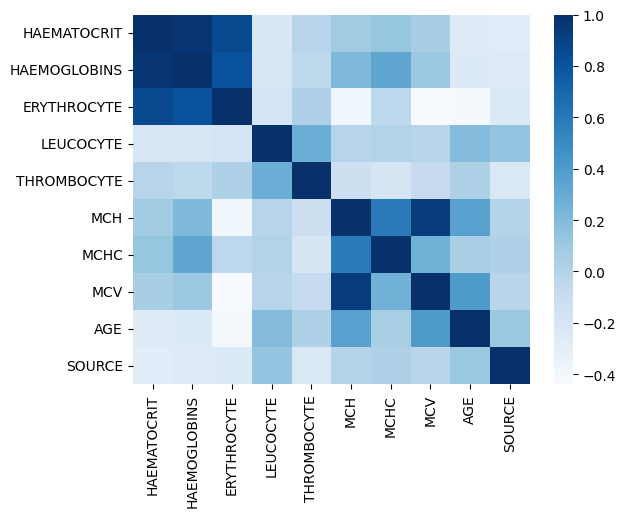

In [ ]:
sns.heatmap(df.drop('SEX',axis=1).corr(),cmap='Blues')

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
rep=ProfileReport(df)
rep

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Checking the skewness in all the feature columns
from scipy.stats import skew
for col in df.drop('SOURCE',axis=1).columns:
  if df[col].dtypes != 'object':
    print(col,"--> ",skew(df[col]))

HAEMATOCRIT -->  -0.30735425285931384
HAEMOGLOBINS -->  -0.3342609941943107
ERYTHROCYTE -->  -0.007185377474427572
LEUCOCYTE -->  2.876274359180426
THROMBOCYTE -->  0.8286718795813097
MCH -->  -1.2217303880693897
MCHC -->  -0.5661805942443353
MCV -->  -0.8118844068186338
AGE -->  -0.13125705524205977


In [ ]:
# Performing train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(['SOURCE'],axis=1),df['SOURCE'],test_size=0.3,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2316, 10)
(993, 10)
(2316,)
(993,)


In [ ]:
X_train['SEX'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
y_train.unique()

array([0, 1])

In [ ]:
# Encoding the 'SEX' column
X_train['SEX'] = X_train['SEX'].map({'M':0,'F':1})
X_test['SEX'] = X_test['SEX'].map({'M':0,'F':1})

In [ ]:
y_train.value_counts()

SOURCE
0    1393
1     923
Name: count, dtype: int64

In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training and Evaluation

In [ ]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score,f1_score ,classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
# Evaluation custom function
def evaluate_model(clf,X_train,X_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("=================================================")
    print("Binary Classification")
    print("=================================================")
    print("Accuracy:", accuracy_score(y_test, y_pred))

    print("Classification Report:\n", classification_report(y_test, y_pred,
                                                            target_names=['Source 0','Source 1']))
    sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='g',
           yticklabels=['Source 0','Source 1'],xticklabels=['Source 0','Source 1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

In [ ]:
# Dictionary of the models to pass to the function
model_dict={
      'Random Forest': RandomForestClassifier(),
      'Gradient Boosting Classifier' : GradientBoostingClassifier(),
      'XGBoost':XGBClassifier(),
      'Gaussian Naive Bayes':GaussianNB()
          }

In [ ]:
#Model Training and evaluation custom function
def model_results(model_dict):
    results=[]
    for modelname,model in model_dict.items():
        model.fit(X_train,y_train)
        acc=accuracy_score(y_test,model.predict(X_test))
        rec=recall_score(y_test,model.predict(X_test))
        f1=f1_score(y_test,model.predict(X_test))
        crossvalscore=np.mean(cross_val_score(model,X_train,y_train,cv=3))
        results.append({'Model Name':modelname,
                        'Accuracy':acc,
                        'Recall':rec,
                        'F1 Score':f1,
                        'Cross Val Score':crossvalscore})
    results_df=pd.DataFrame(results)
    return results_df

In [ ]:
model_results(model_dict)

Model Name  Accuracy    Recall  F1 Score  Cross Val Score
0                 Random Forest  0.762336  0.586294  0.661891         0.750000
1  Gradient Boosting Classifier  0.741188  0.558376  0.631277         0.756908
2                       XGBoost  0.736153  0.571066  0.632022         0.739206
3          Gaussian Naive Bayes  0.702920  0.525381  0.583921         0.705527

Binary Classification
Accuracy: 0.7653575025176234
Classification Report:
               precision    recall  f1-score   support

    Source 0       0.77      0.88      0.82       599
    Source 1       0.77      0.59      0.67       394

    accuracy                           0.77       993
   macro avg       0.77      0.74      0.74       993
weighted avg       0.77      0.77      0.76       993



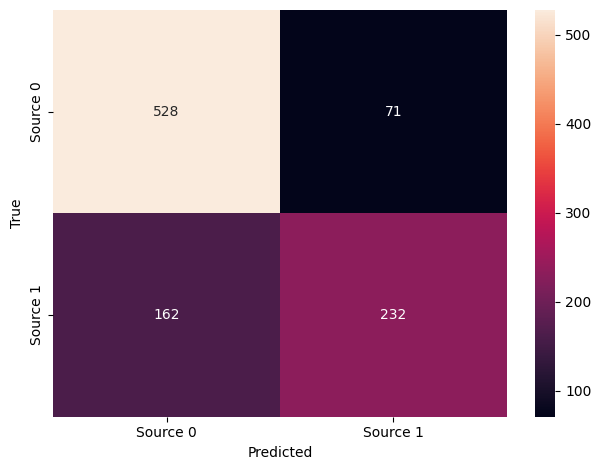

In [ ]:
evaluate_model(RandomForestClassifier(),X_train,X_test)

### Hyperparameter tuning the Random Forest model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]

}

In [ ]:
gs=GridSearchCV(RandomForestClassifier(),param_grid,cv=3)

In [ ]:
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [ ]:
gs.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

Binary Classification
Accuracy: 0.7522658610271903
Classification Report:
               precision    recall  f1-score   support

    Source 0       0.76      0.86      0.81       599
    Source 1       0.74      0.58      0.65       394

    accuracy                           0.75       993
   macro avg       0.75      0.72      0.73       993
weighted avg       0.75      0.75      0.75       993



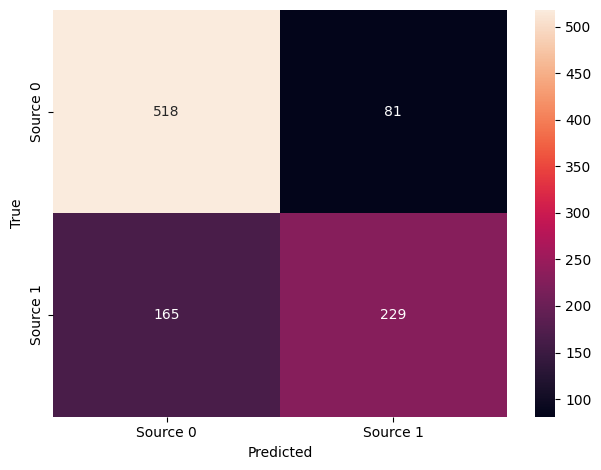

In [ ]:
best_rf=gs.best_estimator_
evaluate_model(best_rf,X_train,X_test)

1. Feature selection was applied but was reducing the accuracy.

2. Tried PCA to remove multicollinearity, but model performance was reduced.

3. **The Random Forest model is giving the best results.**